In [384]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import re
from sklearn.metrics import accuracy_score, precision_score, f1_score
from src.DocumentReader import read_n_documents
from src.shared import process

##### The whole dataset has 2.250.223 documents

In [385]:
docs = read_n_documents(0,30000)
processed_documents = process(docs)
processed_documents

,title,version,abstract,authors_parsed,category_groups
0,Calculation of prompt diphoton production cros...,2007,A fully differential calculation in perturba...,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",[hep-ph]
1,Sparsity-certifying Graph Decompositions,2008,"We describe a new algorithm, the $(k,\ell)$-...","[[Streinu, Ileana, ], [Theran, Louis, ]]","[math, cs]"
2,The evolution of the Earth-Moon system based o...,2008,The evolution of Earth-Moon system is descri...,"[[Pan, Hongjun, ]]",[physics]
3,A determinant of Stirling cycle numbers counts...,2007,We show that a determinant of Stirling cycle...,"[[Callan, David, ]]",[math]
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,2007,In this paper we show how to compute the $\L...,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]","[math, math]"
...,...,...,...,...,...
29995,Theoretical progress on cusp effect and Kl4 de...,2007,The cusp effect in K \to 3\pi and data on K_...,"[[Gasser, J., ]]",[hep-ph]
29996,Group Analysis of Variable Coefficient Diffusi...,2007,This is the second part of the series of pap...,"[[Ivanova, N. M., ], [Popovych, R. O., ], [Sop...","[math-ph, math]"
29997,Theoretical progress on pi pi scattering lengt...,2007,pi pi scattering at low energy is sensitive ...,"[[Colangelo, Gilberto, ]]","[hep-ph, hep-lat]"
29998,Pair correlations in sandpile model: a check o...,2007,We compute the correlations of two height va...,"[[Poghosyan, V. S., ], [Grigorev, S. Y., ], [P...","[cond-mat, hep-th, math-ph, math]"


##### Map Categories like ["Physics", "Maths"] to indexes like [0,1]

In [386]:
def map_categories_to_indexes(categories):
    unique_categories = []
    all_indexes = []
    for i in categories:
        document_indexes = []
        for category in i:
            if category not in unique_categories:
                unique_categories.append(category)
                document_indexes.append(len(unique_categories)-1)
            else:
                if unique_categories.index(category) not in document_indexes:
                    document_indexes.append(unique_categories.index(category))
        all_indexes.append(document_indexes)
    return all_indexes, unique_categories


In [387]:
all_indexes, labels = map_categories_to_indexes(processed_documents['category_groups'].values)
print(all_indexes)

[[0], [1, 2], [3], [1], [1], [4], [5], [4], [6], [1], [1], [1], [1], [1], [7], [0], [6], [7], [1], [8], [9, 3, 10], [1], [6], [9], [4], [1], [4], [1], [0], [4], [0], [0], [3], [10, 11], [3], [10], [3], [3], [0, 12, 13], [1], [1, 14], [3, 11], [4], [6, 9, 3], [9], [11, 2, 1], [2], [5, 6], [1], [2], [3, 11], [7], [1, 5], [1], [4], [4], [4], [3], [6], [13], [1], [2], [0], [7], [1], [7], [4], [1], [1], [4], [3], [14, 1], [1], [1], [0, 8, 15], [0, 8], [3], [5], [1], [6], [1, 7, 14], [4], [7], [4, 9, 3], [7], [1], [1], [3], [3], [2, 4, 3], [1], [12, 0], [4], [6], [1], [9], [14, 1], [2, 1], [1], [5], [7], [1], [5], [1], [1], [0, 13], [3], [2], [4], [1], [1], [1], [4], [4], [1], [14, 7, 1], [11], [4], [4], [8, 0], [7], [4], [9, 4, 3], [1], [1], [4], [4], [6], [1, 14], [1], [3], [4], [6], [13], [11], [3], [11], [5, 6], [6], [7], [0], [4], [0], [7, 6, 5], [5], [4], [3, 11], [4], [5], [4], [3], [13], [3], [13, 0, 15], [6], [6], [4, 3], [10], [4], [6], [4], [3], [4], [1], [1], [7], [0], [6], [0], 

##### Map indexes like [[0,1],[1,2]] to [[1,1,0],[0,1,1]]

In [388]:
from sklearn.preprocessing import MultiLabelBinarizer
import scipy.sparse as sp
mlb = MultiLabelBinarizer()

# y = sp.csr_array(mlb.fit_transform(all_indexes))
y = mlb.fit_transform(all_indexes)

In [389]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [390]:
y.shape

(30000, 19)

In [391]:
labels

['hep-ph',
 'math',
 'cs',
 'physics',
 'cond-mat',
 'gr-qc',
 'astro-ph',
 'hep-th',
 'hep-ex',
 'nlin',
 'q-bio',
 'quant-ph',
 'hep-lat',
 'nucl-th',
 'math-ph',
 'nucl-ex',
 'stat',
 'q-fin',
 'econ']

<BarContainer object of 19 artists>

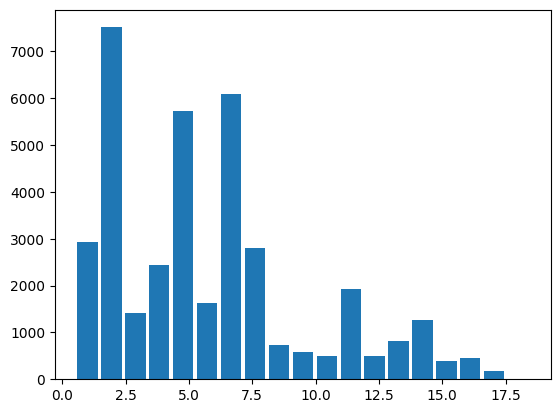

In [392]:
label_counts = y.sum(axis=0)
plt.bar(np.linspace(1,18,len(label_counts)), label_counts)

In [393]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

#What does the regular expression r'w{1,} do?
count_vect = CountVectorizer(analyzer='word')
# count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')

#"fit" is actually building the vocabulary
count_vect.fit(processed_documents['abstract'].values)

#the transformation converts the text to bag-of-words
X = count_vect.transform(processed_documents['abstract'].values)  #these are sparse BOW matrices for Q1

In [394]:
# from scipy.sparse import save_npz
# save_npz("30k_dataset", X)

In [395]:
# np.save("30k_labels",y)

##### Load dataset from file

In [399]:
y = np.load("30k_labels.npy")
y.shape

(30000, 19)

In [403]:
from scipy.sparse import load_npz
X = load_npz("30k_dataset.npz")
X.shape

(30000, 57157)

### Split data into training and test sets

In [404]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = 42)
X_train, X_valid_train, y_train, y_valid_train = train_test_split(X_train, y_train, test_size = 0.25, shuffle = True, random_state = 42)
# X_test, X_valid_test, y_test, y_valid_test = train_test_split(X_test,y_test, test_size = 0.5, shuffle = True, random_state = 42)


In [405]:
print("All data",y.shape)
print("Train",y_train.shape)
print("Valid train",y_valid_train.shape)
# print("Valid test",y_valid_test.shape)
print("Test",y_test.shape)

All data (30000, 19)
Train (18000, 19)
Valid train (6000, 19)
Test (6000, 19)


In [406]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
multilabel_model = MultiOutputClassifier(knn_model).fit(X_train,y_train)
valid_predictions = multilabel_model.predict(X_test)

In [407]:
from sklearn.metrics import f1_score, classification_report, accuracy_score
# The caases, where all predicted labels were correct at the same time!
print("All labels correct at once", f1_score(valid_predictions, y_test, average="micro"))

All labels correct at once 0.40699208443271767


In [408]:
# The cases when one specific label was correct!
valid_scores = []
print("F1 scores for each category")
print()
for i in range(y_test.shape[1]):
    score = f1_score(valid_predictions[:,i], y_test[:,i], average="macro")
    score = round(score,2)*100
    print(labels[i]+":", int(score), "% with count:", label_counts[i])
    valid_scores.append(score)

F1 scores for each category

hep-ph: 64 % with count: 2933
math: 71 % with count: 7516
cs: 64 % with count: 1412
physics: 55 % with count: 2443
cond-mat: 64 % with count: 5735
gr-qc: 60 % with count: 1636
astro-ph: 74 % with count: 6099
hep-th: 62 % with count: 2793
hep-ex: 66 % with count: 725
nlin: 53 % with count: 588
q-bio: 56 % with count: 504
quant-ph: 63 % with count: 1933
hep-lat: 64 % with count: 500
nucl-th: 59 % with count: 820
math-ph: 55 % with count: 1271
nucl-ex: 59 % with count: 395
stat: 56 % with count: 447
q-fin: 53 % with count: 177
econ: 100 % with count: 3


In [409]:
print("Weighted F1-scores",np.average(np.array(valid_scores), weights=label_counts))
print("Macro F1-scores", np.average(np.array(valid_scores)))

Weighted F1-scores 65.20150276825731
Macro F1-scores 63.05263157894737


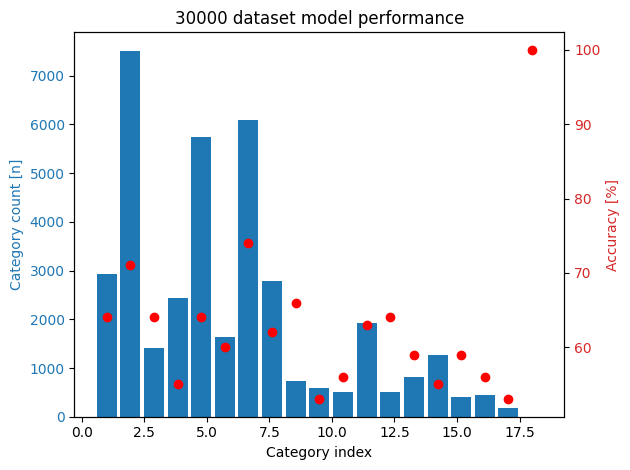

In [410]:
fig, ax1 = plt.subplots()

ax1.set_title(f"{y.shape[0]} dataset model performance")
color = 'tab:blue'
ax1.set_xlabel('Category index')
ax1.set_ylabel('Category count [n]', color=color)
ax1.bar(np.linspace(1,18,len(label_counts)), label_counts, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Accuracy [%]', color=color)  # we already handled the x-label with ax1
ax2.scatter(np.linspace(1,18,len(label_counts)), valid_scores, c="red")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


### Hyperparameter Tuning

In [414]:
from sklearn.ensemble import RandomForestClassifier
results = {"Validation F1 score":[],"Test F1 score":[]}
# params = []
params = [1,2,3,4,5,6,7,8,9,10]
for p in params:
    knn_model = KNeighborsClassifier(n_neighbors=p)
    multilabel_model = MultiOutputClassifier(knn_model).fit(X_train,y_train)
    valid_predictions = multilabel_model.predict(X_valid_train)
    test_predictions = multilabel_model.predict(X_test)

    # all_at_once = round(f1_score(predictions, y_valid_train, average="micro")*100,1)
    # results["All_at_once"].append(all_at_once)
    # print("All labels correct at once", all_at_once,"%")


    # The cases when one specific label was correct!
    valid_scores = []
    for i in range(y_valid_train.shape[1]):
        score = f1_score(valid_predictions[:,i], y_valid_train[:,i], average="macro")
        score = round(score,2)*100
        valid_scores.append(score)
    test_scores = []
    for i in range(y_test.shape[1]):
        score = f1_score(test_predictions[:,i], y_test[:,i], average="macro")
        score = round(score,2)*100
        test_scores.append(score)


    # weighted = round(np.average(np.array(scores), weights=label_counts),1)
    # results["Weighted_F1"].append(weighted)
    # print("Weighted F1-scores",weighted, "%")

    macro = round(np.average(np.array(valid_scores)), 1)
    results["Validation F1 score"].append(macro)
    print("Validation F1-scores", macro,"%")
    macro = round(np.average(np.array(test_scores)), 1)
    results["Test F1 score"].append(macro)
    print("Test F1-scores", macro,"%")

Validation F1-scores 60.2 %
Test F1-scores 63.1 %
Validation F1-scores 55.5 %
Test F1-scores 58.6 %
Validation F1-scores 58.0 %
Test F1-scores 60.9 %
Validation F1-scores 54.9 %
Test F1-scores 57.7 %
Validation F1-scores 56.3 %
Test F1-scores 59.3 %


KeyboardInterrupt: 

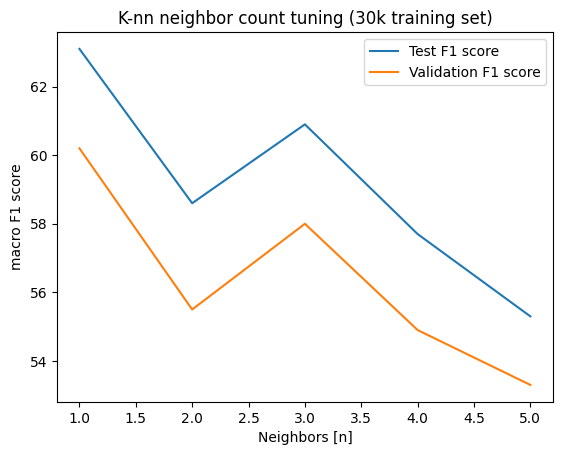

In [422]:
result_list = np.array(list(results.values())).T
plt.plot(params, result_list)
plt.xlabel("Tree Depth [n]")
plt.ylabel("macro F1 score")
plt.title("Decision Tree depth tuning (30k training set)")
plt.legend(list(results.keys()))